
# **Context**



Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.

At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.


**Task**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.

**Source:**

https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction



# **Plan**

1. Data Gathering and Cleaning

2. Feature Engineering

3. Data Visualization

4. Feature Scaling

5. Dealing with Unbalanced Dataset

6. Model Deployment



# **Gathering data**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
application_record = pd.read_csv('/content/application_record.csv')
credit_record = pd.read_csv('/content/credit_record.csv')


In [ ]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [ ]:
application_record.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [ ]:
application_record.duplicated().sum()

0

In [ ]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [ ]:
application_record['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

In [ ]:
application_record['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64

In [ ]:
application_record['NAME_HOUSING_TYPE'].value_counts()

House / apartment      393831
With parents            19077
Municipal apartment     14214
Rented apartment         5974
Office apartment         3922
Co-op apartment          1539
Name: NAME_HOUSING_TYPE, dtype: int64

In [ ]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [ ]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
credit_record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
#So, we have two dataset, let's unite them into one data

df = pd.merge(application_record, credit_record, on = 'ID', how = 'inner')

In [ ]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


In [ ]:
#Let's rename some columns' names

df = df.rename(columns =
 {'CODE_GENDER': 'GENDER',
 'AMT_INCOME_TOTAL':'ANNUAL_INCOME'})

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   GENDER               777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   ANNUAL_INCOME        777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
df.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE        240048
ID                          0
GENDER                      0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
ANNUAL_INCOME               0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [ ]:
df.duplicated().sum()

0

As we can see, there is no duplicate values. if we had duplicate values, we would use drop_duplicates function to tackle.

# **Feature Engineering**

We will be performing all the below steps:

1. Missing values

2. Temporal variables

3. Categorical variables

4. Standartise the values of the variables

In [ ]:
df.isnull().sum().sort_values(ascending = False)

OCCUPATION_TYPE        240048
ID                          0
GENDER                      0
MONTHS_BALANCE              0
CNT_FAM_MEMBERS             0
FLAG_EMAIL                  0
FLAG_PHONE                  0
FLAG_WORK_PHONE             0
FLAG_MOBIL                  0
DAYS_EMPLOYED               0
DAYS_BIRTH                  0
NAME_HOUSING_TYPE           0
NAME_FAMILY_STATUS          0
NAME_EDUCATION_TYPE         0
NAME_INCOME_TYPE            0
ANNUAL_INCOME               0
CNT_CHILDREN                0
FLAG_OWN_REALTY             0
FLAG_OWN_CAR                0
STATUS                      0
dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].fillna('Other', inplace = True)

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df.isnull().sum()

ID                     0
GENDER                 0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
ANNUAL_INCOME          0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
MONTHS_BALANCE         0
STATUS                 0
dtype: int64

In [ ]:
df = df.dropna()

Now we don't have NULL values

In [ ]:
df.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-4,C


In [ ]:
gender = df['GENDER'].value_counts()
car = df['FLAG_OWN_CAR'].value_counts()
realty = df['FLAG_OWN_REALTY'].value_counts()

print(f"{gender}\n{car}\n{realty}")


F    518851
M    258864
Name: GENDER, dtype: int64
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64
Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64


In [ ]:
df['GENDER'].replace({'F': 0, 'M':1}, inplace = True)
df['FLAG_OWN_CAR'].replace({'Y':1, 'N':0}, inplace = True)
df['FLAG_OWN_REALTY'].replace({'Y':1, 'N':0}, inplace = True)

In [ ]:
df.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,0,C
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-1,C
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-2,C
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-3,C
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,-4,C


In [ ]:
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int)

In [ ]:
import datetime
from datetime import timedelta

def Date_of_Birth(total_days):
    today = datetime.date.today()
    birthday = (today + timedelta(days=total_days)).strftime('%Y-%m-%d')
    return birthday

df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(Date_of_Birth)


In [ ]:
df['AGE'] = (pd.to_datetime('today').year - pd.to_datetime(df['DAYS_BIRTH']).dt.year)


In [ ]:
df.rename(columns = {"DAYS_EMPLOYED" : "EXPERIENCE"}, inplace=True)
df["EXPEREINCE"] = round(abs(df["EXPERIENCE"]/365),1)

In [ ]:
df.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,EXPEREINCE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,0,C,33,12.4
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-1,C,33,12.4
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-2,C,33,12.4
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-3,C,33,12.4
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-4,C,33,12.4


In [ ]:
df['STATUS'].value_counts()

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64

In [ ]:
map_status = {'C' : 0,
              'X' : 0,
              '0' : 0,
              '1' : 1,
              '2' : 1,
              '3' : 1,
              '4' : 1,
              '5' : 1}

df["STATUS"] = df['STATUS'].map(map_status)

In [ ]:
df['STATUS'].value_counts()

0    766140
1     11575
Name: STATUS, dtype: int64

# **Data Visualization**

In [ ]:
df.head(2)

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,EXPEREINCE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,0,0,33,12.4
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-1,0,33,12.4


<Axes: >

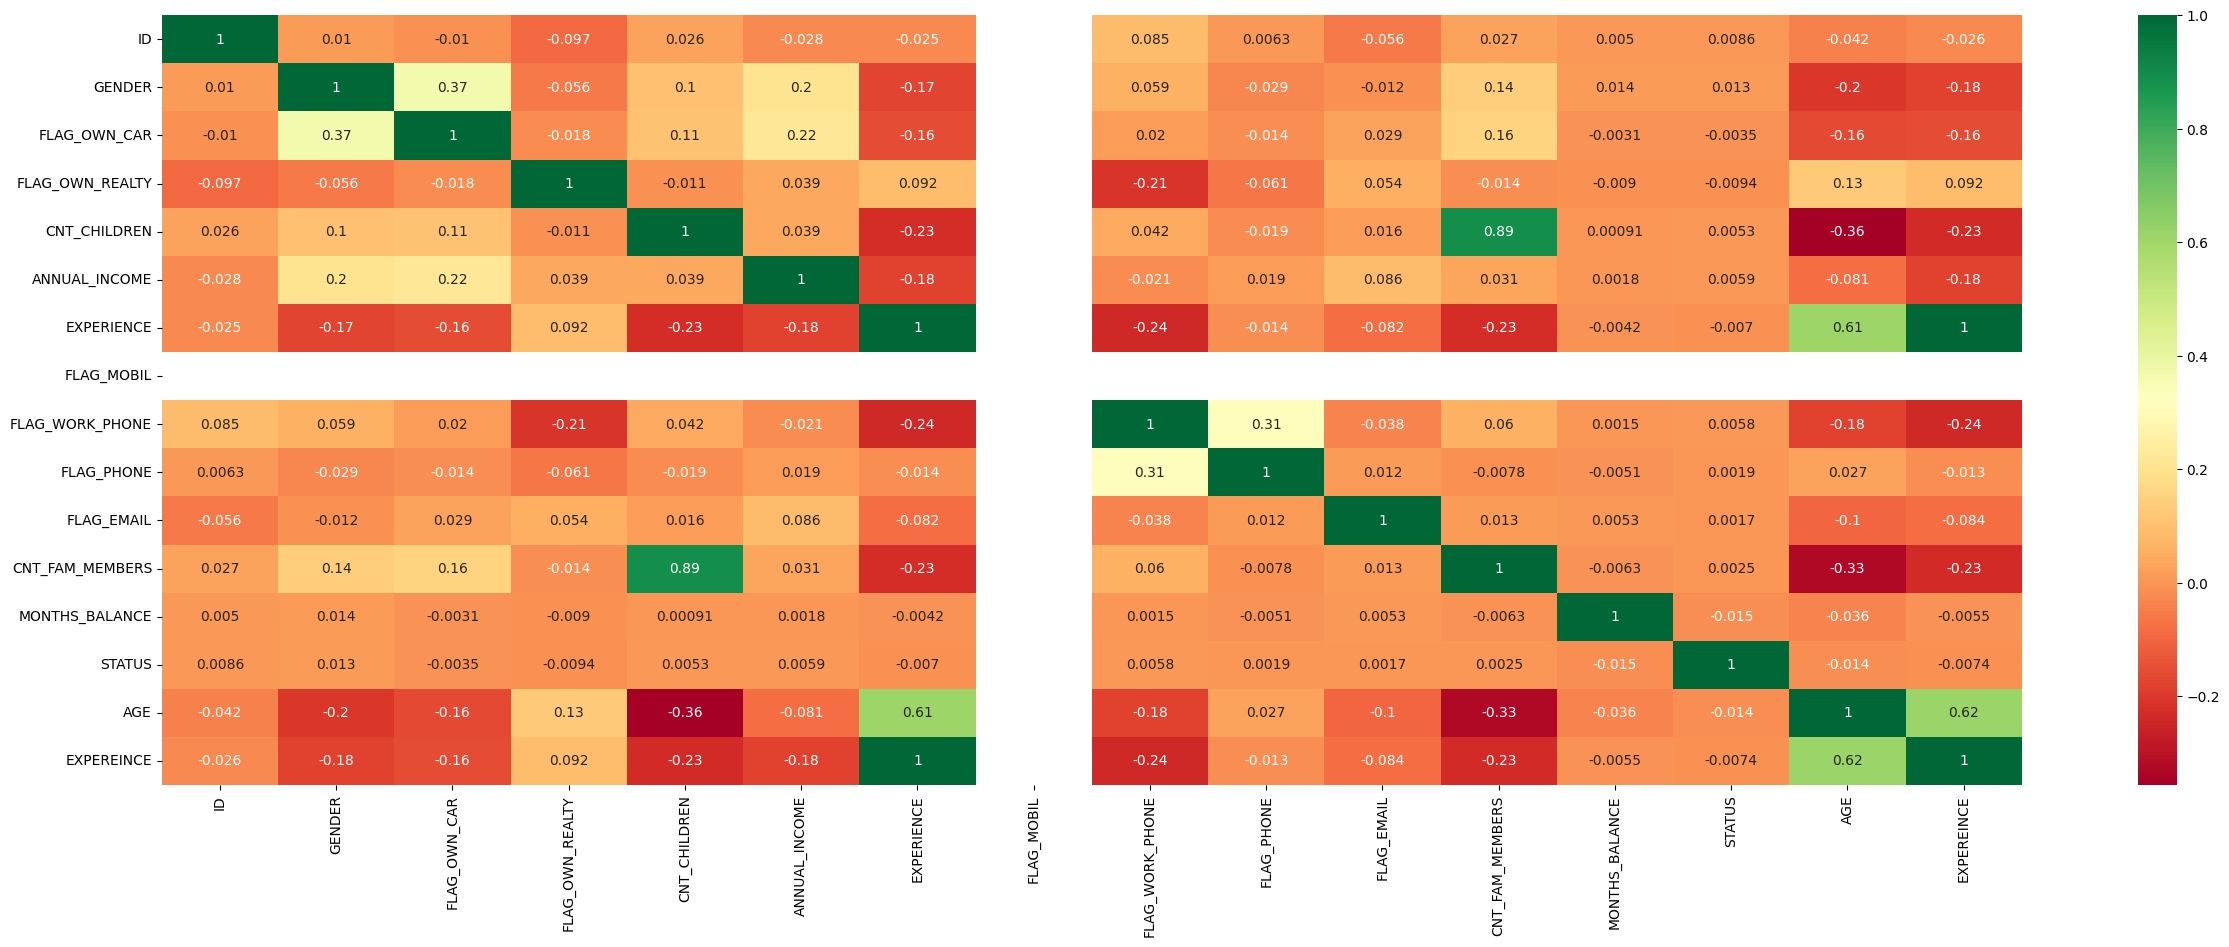

In [ ]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap='RdYlGn')

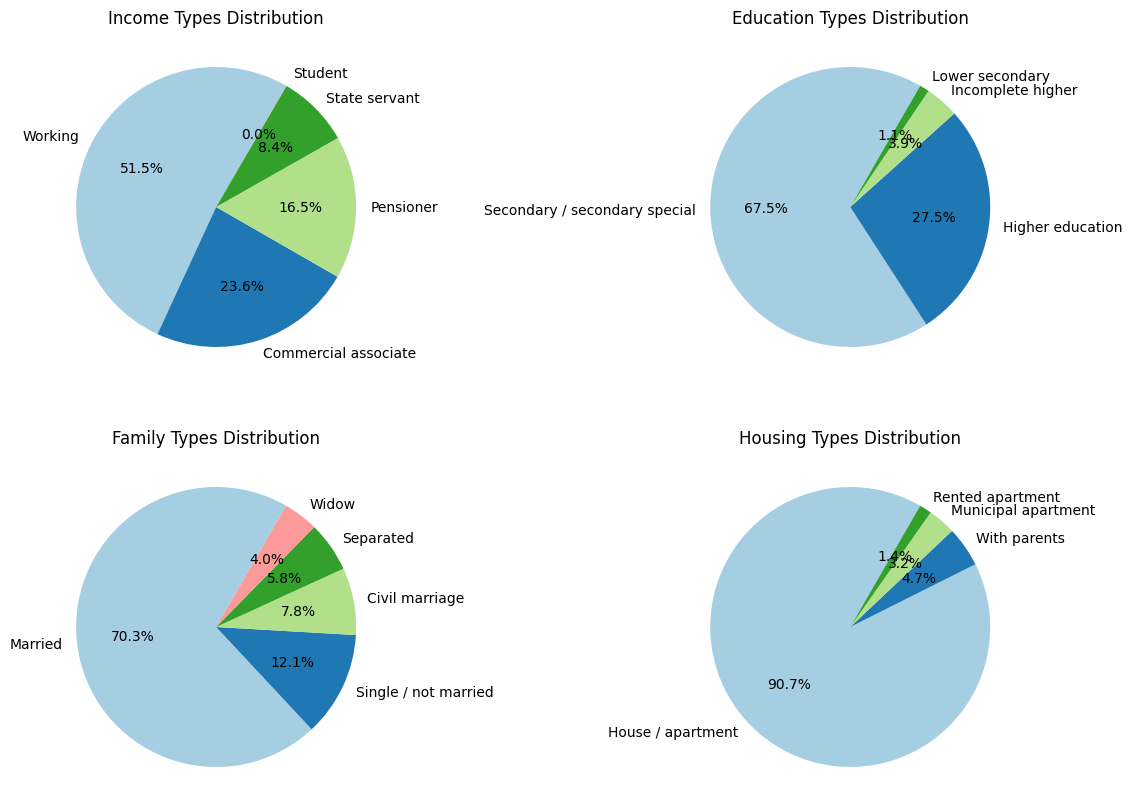

In [ ]:

plt.figure(figsize=(15, 10))

income_counts = df['NAME_INCOME_TYPE'].value_counts()
plt.subplot(2,2,1)
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=60, colors=plt.cm.Paired.colors)
plt.title('Income Types Distribution')

education_counts = df['NAME_EDUCATION_TYPE'].value_counts().nlargest(4)
plt.subplot(2,2,2)
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=60, colors=plt.cm.Paired.colors)
plt.title('Education Types Distribution')

family_counts = df['NAME_FAMILY_STATUS'].value_counts()
plt.subplot(2,2,3)
plt.pie(family_counts, labels=family_counts.index, autopct='%1.1f%%', startangle=60, colors=plt.cm.Paired.colors)
plt.title('Family Types Distribution')

housing_counts = df['NAME_HOUSING_TYPE'].value_counts().nlargest(4)
plt.subplot(2,2,4)
plt.pie(housing_counts, labels=housing_counts.index, autopct='%1.1f%%', startangle=60, colors=plt.cm.Paired.colors)
plt.title('Housing Types Distribution')

plt.show()





In [ ]:
df['OCCUPATION_TYPE'].value_counts()


Other                    240048
Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df.head()

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,EXPEREINCE
0,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,0,0,33,12.4
1,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-1,0,33,12.4
2,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-2,0,33,12.4
3,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-3,0,33,12.4
4,5008804,1,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,1,0,0,Other,2,-4,0,33,12.4


In [ ]:
df['AGE'].describe()

count    777715.000000
mean         44.602080
std          11.237625
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

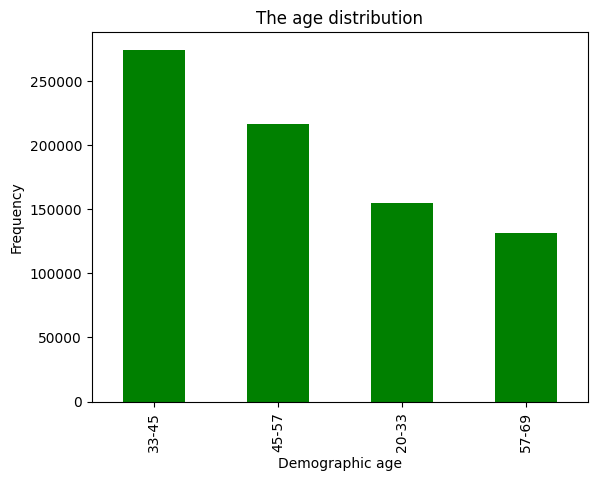

In [ ]:
labels = ['20-33', '33-45', '45-57', '57-69']
age_cut = pd.cut(df['AGE'], 4, labels = labels)
age_cut.value_counts().plot(kind = 'bar', color = 'green')
plt.title('The age distribution')
plt.xlabel('Demographic age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.cut(df['ANNUAL_INCOME'], 10).value_counts()

(25452.0, 181800.0]       472222
(181800.0, 336600.0]      246863
(336600.0, 491400.0]       47802
(491400.0, 646200.0]        5746
(646200.0, 801000.0]        3512
(801000.0, 955800.0]        1209
(1420200.0, 1575000.0]       150
(1265400.0, 1420200.0]       102
(1110600.0, 1265400.0]        83
(955800.0, 1110600.0]         26
Name: ANNUAL_INCOME, dtype: int64

# **Feature Scaling**

Let's make all data in one scale, in num or int

In [ ]:
df.head(2)

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE,EXPEREINCE
0,5008804,1,1,1,0,427500.0,1,2,3,4,...,1,1,0,0,Other,2,0,0,33,12.4
1,5008804,1,1,1,0,427500.0,1,2,3,4,...,1,1,0,0,Other,2,-1,0,33,12.4


In [ ]:
#Let's create a list

list1 = {'Secondary / secondary special':1, 'Higher education':2, 'Incomplete higher':3, 'Lower secondary':4, 'Academic degree':5}
list2 = {'Working':1, 'Commercial associate':2, 'Pensioner':3, 'State servant':4, 'Student':5 }
list3 = {'Married':1, 'Single / not married':2, 'Civil marriage':3, 'Separated':4, 'Widow':5}
list4 = {'House / apartment':1, 'With parents':2, 'Municipal apartment':3,'Rented apartment':4, 'Office apartment':5, 'Co-op apartment':6}

df.replace({'NAME_EDUCATION_TYPE':list1}, inplace = True)
df.replace({'NAME_INCOME_TYPE':list2}, inplace = True)
df.replace({'NAME_FAMILY_STATUS':list3}, inplace = True)
df.replace({'NAME_HOUSING_TYPE':list4}, inplace = True)



In [ ]:
#df.drop(columns = 'OCCUPATION_TYPE', inplace  = True)
#df.drop(columns = 'Experience', inplace  = True)
df.drop(columns = 'DAYS_BIRTH', inplace  = True)

In [ ]:
df.rename(columns = {'EXPERIENCE':'Experience'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   GENDER               777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   ANNUAL_INCOME        777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int64  
 7   NAME_EDUCATION_TYPE  777715 non-null  int64  
 8   NAME_FAMILY_STATUS   777715 non-null  int64  
 9   NAME_HOUSING_TYPE    777715 non-null  int64  
 10  FLAG_MOBIL           777715 non-null  int64  
 11  FLAG_WORK_PHONE      777715 non-null  int64  
 12  FLAG_PHONE           777715 non-null  int64  
 13  FLAG_EMAIL           777715 non-null  int64  
 14  CNT_FAM_MEMBERS      777715 non-null  int64  
 15  MONTHS_BALANCE   

Now we have all numeric (with float) data and we can apply these to feature scale

In [ ]:
df['STATUS'].value_counts()

0    766140
1     11575
Name: STATUS, dtype: int64

In [ ]:
correlation_matrix = df.corr()
status_correlation = correlation_matrix['STATUS']
status_correlation

ID                     0.008594
GENDER                 0.012782
FLAG_OWN_CAR          -0.003457
FLAG_OWN_REALTY       -0.009353
CNT_CHILDREN           0.005254
ANNUAL_INCOME          0.005857
NAME_INCOME_TYPE      -0.000150
NAME_EDUCATION_TYPE    0.009747
NAME_FAMILY_STATUS     0.001612
NAME_HOUSING_TYPE      0.005512
FLAG_MOBIL                  NaN
FLAG_WORK_PHONE        0.005831
FLAG_PHONE             0.001883
FLAG_EMAIL             0.001688
CNT_FAM_MEMBERS        0.002454
MONTHS_BALANCE        -0.015068
STATUS                 1.000000
AGE                   -0.014423
EXPEREINCE            -0.007445
Name: STATUS, dtype: float64

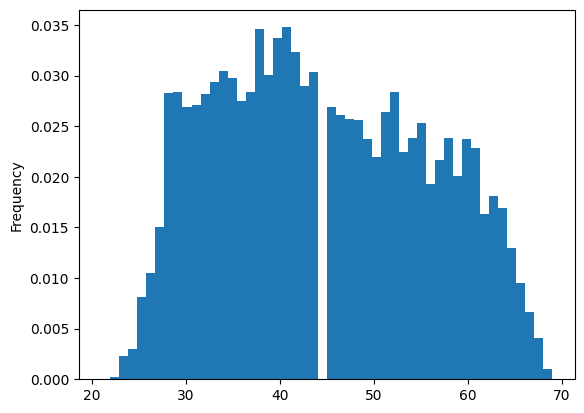

In [ ]:
df['AGE'].plot(kind='hist', bins=50, density=True)
plt.show()

In [ ]:
map_status = {'C' : 0,
              'X' : 0,
              '0' : 0,
              '1' : 1,
              '2' : 1,
              '3' : 1,
              '4' : 1,
              '5' : 1}

df['APPROVED'] = credit_record['STATUS'].map(map_status)

In [ ]:
X = df
X.drop('APPROVED', axis = 1)

,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,ANNUAL_INCOME,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,MONTHS_BALANCE,AGE,EXPEREINCE
0,1,1,1,0,427500.0,1,2,3,4,1,1,0,0,2,0,33,12.4
1,1,1,1,0,427500.0,1,2,3,4,1,1,0,0,2,-1,33,12.4
2,1,1,1,0,427500.0,1,2,3,4,1,1,0,0,2,-2,33,12.4
3,1,1,1,0,427500.0,1,2,3,4,1,1,0,0,2,-3,33,12.4
4,1,1,1,0,427500.0,1,2,3,4,1,1,0,0,2,-4,33,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,1,0,1,0,112500.0,1,1,2,4,1,0,0,0,1,-9,26,3.3
777711,1,0,1,0,112500.0,1,1,2,4,1,0,0,0,1,-10,26,3.3
777712,1,0,1,0,112500.0,1,1,2,4,1,0,0,0,1,-11,26,3.3
777713,1,0,1,0,112500.0,1,1,2,4,1,0,0,0,1,-12,26,3.3


In [ ]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=12)

In [ ]:
Y = df['APPROVED']

In [ ]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: APPROVED, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y.to_numpy())

Dealing with Unbalanced data

In [ ]:
df['APPROVED'].value_counts()

From the above output,we conclude that data is imbalanced.so, we have to do either under sampling or over sampling.we are going to do over sampling bcz in under sampling .we will lost our almost data.

In [ ]:
from collections import Counter
print('original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

In [ ]:
rfc = RandomForestClassifier(n_estimators = 1000, max_features = 12)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    191932
           1       1.00      1.00      1.00      2497

    accuracy                           1.00    194429
   macro avg       1.00      1.00      1.00    194429
weighted avg       1.00      1.00      1.00    194429

